# Health Care

In [52]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, roc_curve

import warnings
warnings.filterwarnings('ignore')

#### Download dataset and perform basic checks

In [2]:
# import dataset

heath_df = pd.read_excel('1645792390_cep1_dataset.xlsx')
heath_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heath_df.shape

(303, 14)

In [4]:
heath_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
heath_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heath_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heath_df.duplicated().sum()

1

In [8]:
heath_df.drop_duplicates(inplace=True)
heath_df.shape

(302, 14)

All the values are numeric, but few of them are categorical.

We can proceed with EDA with the continuous data and then categorical data.

#### EDA (Univeriate)

#### Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

#### Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [9]:
def dist_plot(df, col, hue_val= None):
    sns.histplot(data= df, x= col, hue= hue_val, kde=True)
    plt.show()

In [10]:
def box_plot(df, col):
    sns.boxplot(data= df, x= 'target', y= col)
    plt.show()

In [11]:
def count_plot(df, col, hue_val= None):
    sns.countplot(data= df, x= col, hue= hue_val)
    plt.show()

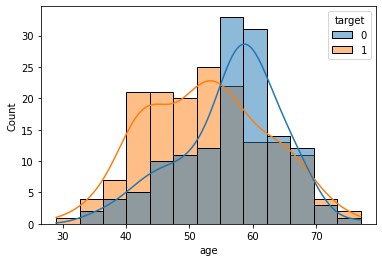

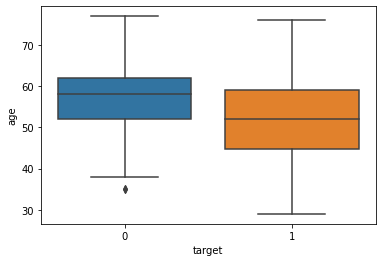

In [12]:
# EDA Age

dist_plot(heath_df, 'age', 'target')
box_plot(heath_df, 'age')

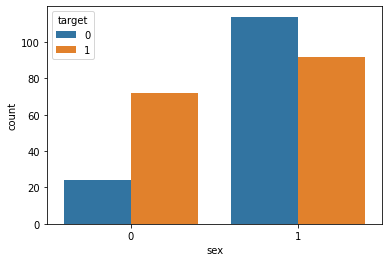

In [13]:
# EDA sex

count_plot(heath_df, 'sex', 'target')

We can see, count of men are more than woman in this data, but considering the heart attack count due to Cardiovascular diseases, women count is more than men based on total respective counts.

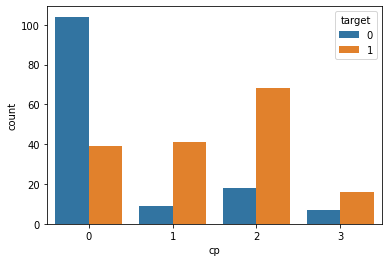

In [14]:
# EDA Cp

count_plot(heath_df, 'cp', 'target')

We have total 4 types of chest pains. But heart attack count is more in case of types like 1, 2, 3.

Again, type 0 has highest count of being safe and type 2 has highest count in heart attack due to the desease.

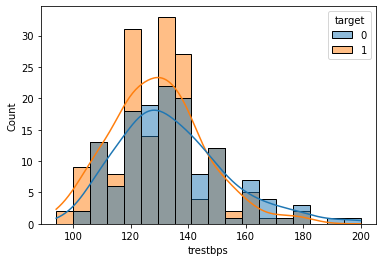

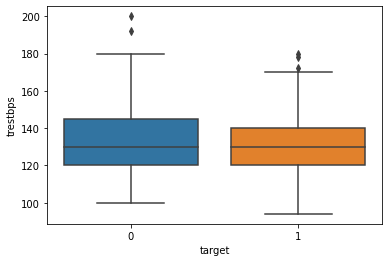

In [15]:
# EDA Trestbps

dist_plot(heath_df, 'trestbps', 'target')
box_plot(heath_df, 'trestbps')

There is no proper separation of distributions.

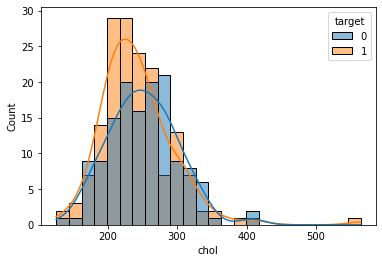

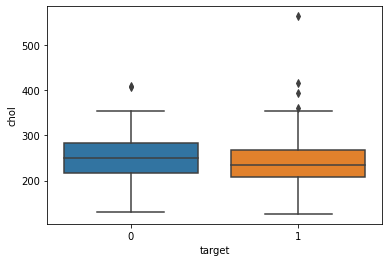

In [16]:
# EDA Chol

dist_plot(heath_df, 'chol', 'target')
box_plot(heath_df, 'chol')

Again from the distribution, we cant get anyting about the heart attack.

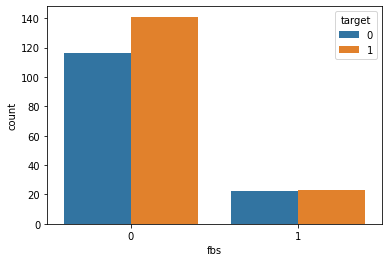

In [17]:
# EDA Fbs

count_plot(heath_df, 'fbs', 'target')

FBS count for 0 is more than 1 due to nature of data, but heart attack count in more as compared to total count in case of type 0.

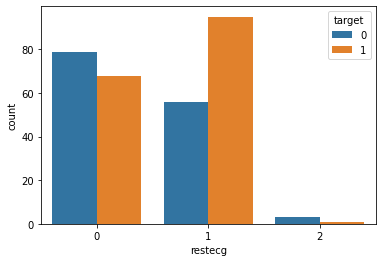

In [18]:
# EDA restecg

count_plot(heath_df, 'restecg', 'target')

As we can see, type 2 has very less count as compared to others. But in case of type 1, the heart attack count is much high.

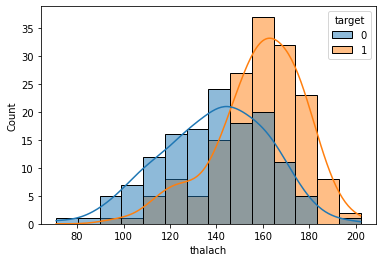

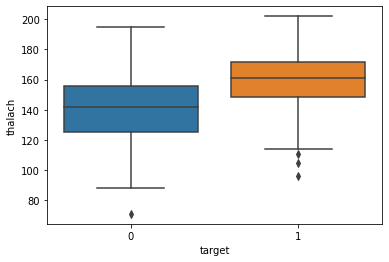

In [19]:
# EDA Thaiach

dist_plot(heath_df, 'thalach', 'target')
box_plot(heath_df, 'thalach')

We dont see any reasonable difference in both distributions.

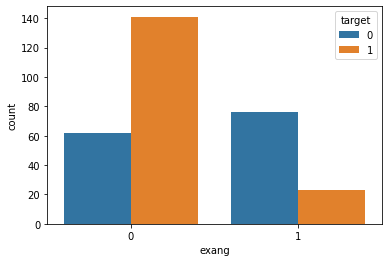

In [20]:
# EDA Exang

count_plot(heath_df, 'exang', 'target')

We have much count of type 0 than type 1 and also the heart attack count is much higher in case of type 0.

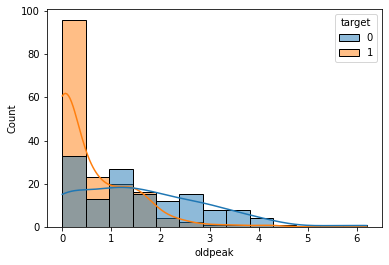

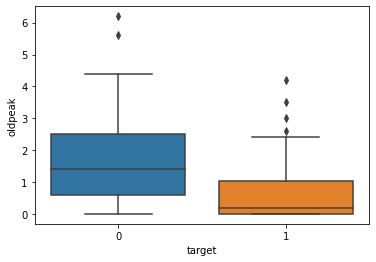

In [21]:
# EDA Oldpeak

dist_plot(heath_df, 'oldpeak', 'target')
box_plot(heath_df, 'oldpeak')

Values close to 0 have higher heart attack count. But here we can see outliers, which we can get rid of.

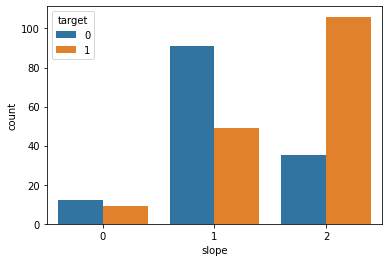

In [22]:
# EDA Slope

count_plot(heath_df, 'slope', 'target')

We can see, there are 3 types where type 1 and type 2 have high counts, but for type 2, heart attack counts are much higher.

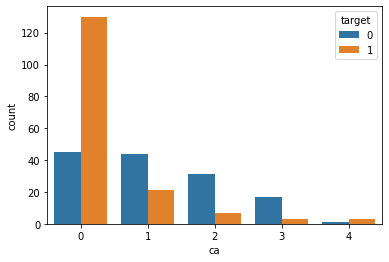

In [23]:
# EDA ca

count_plot(heath_df, 'ca', 'target')

We have 5 types where the counts are descreasing, but if we check the heart attack count for each type, type 0 got the highest.

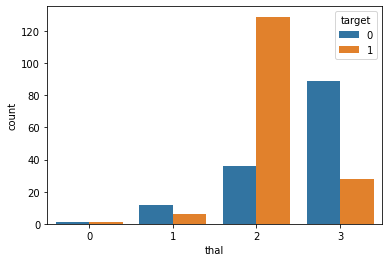

In [24]:
# EDA Thal

count_plot(heath_df, 'thal', 'target')

There are total 4 types where type 1 and type 0 have very less count, but other two have more. But considering the heart attack count, type 2 got more count.

#### List how the other factors determine the occurrence of CVD

#### Check if thalassemia is a major cause of CVD

Lets check the important features based on correlation with target value.

In [25]:
corr = heath_df.corr()['target'].sort_values(ascending= False)[1:]

In [26]:
corr

cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64

As we can see, thalach, cp, slope are highly correlated with taget (+ve), where as oldpeak, exang, ca, thal have high -e correlation.

SO we can use them to build ML models.

Thalach feature is the major contributor in determining heart attack.

#### EDA (Bivariate)

#### Use a pair plot to understand the relationship between all the given variables

Lets consider the top features and do bivarite EDA on them.

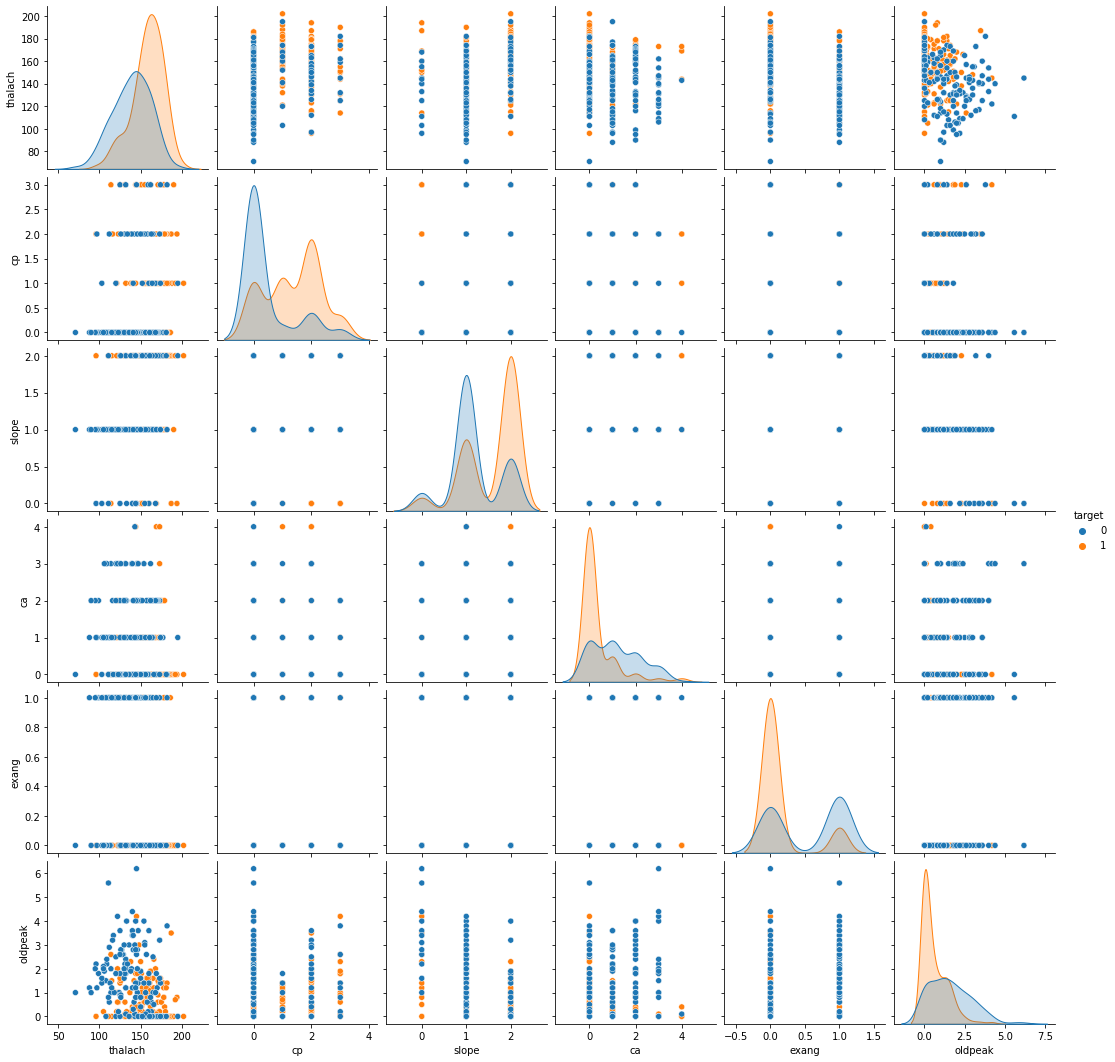

In [27]:
features = ['thalach', 'cp', 'slope', 'ca', 'exang', 'oldpeak']
sns.pairplot(data= heath_df, vars= features, hue='target')
plt.show()

From the pairlot, we can see, for extream values of thalach, there is high chance of heart attack. HIgher cp values with thalach values also contribute more to target values. Slope and oldpeak both contribute to target value with high values.

oldpeak higher values with specific catagories of cp, slope and ca contributes more to heart attack.

Lets now try for rest of the features.

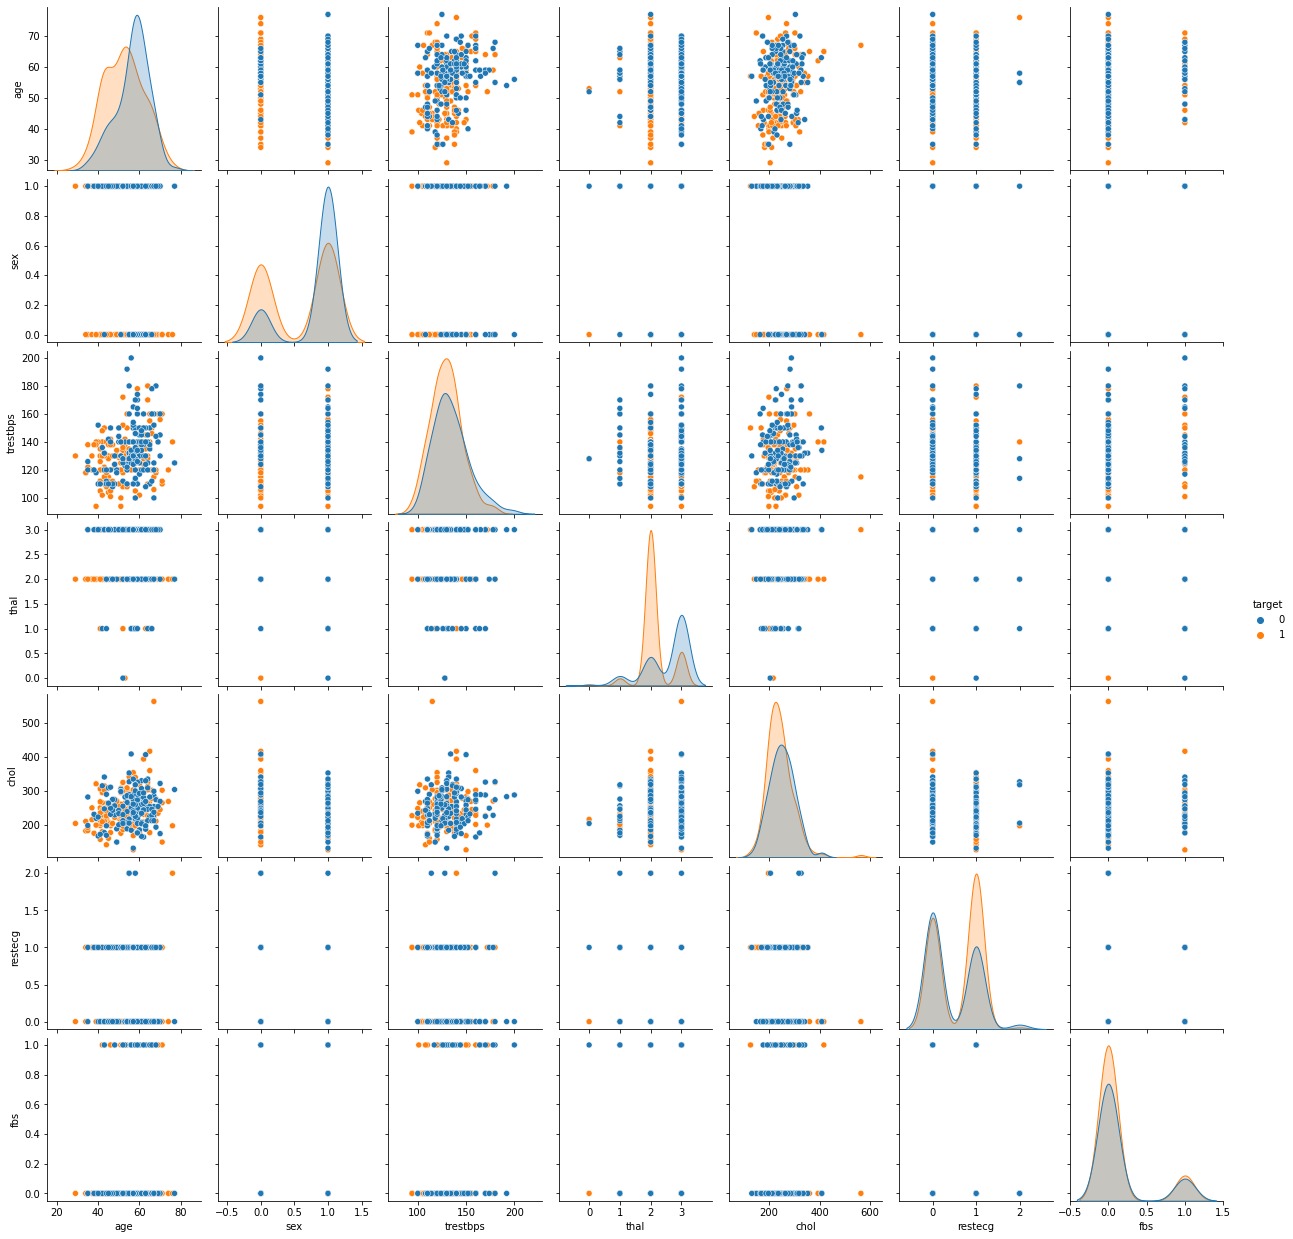

In [28]:
features = set(heath_df.columns.to_list()) - set(['thalach', 'cp', 'slope', 'ca', 'exang', 'oldpeak'])
features.remove('target')
sns.pairplot(data= heath_df, vars= features, hue='target')
plt.show()

trestbps, sex and age contribute together to heart attack.

#### Study the occurrence of CVD across the Age category

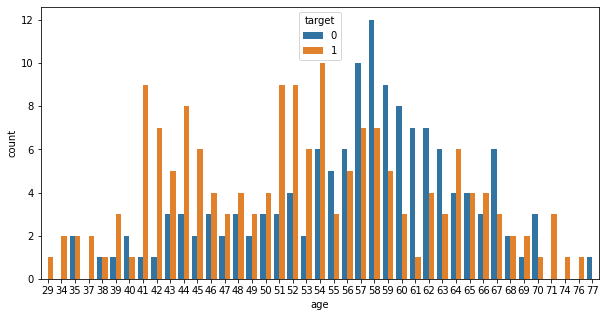

In [29]:
plt.figure(figsize=(10, 5))
count_plot(heath_df, 'age', 'target')

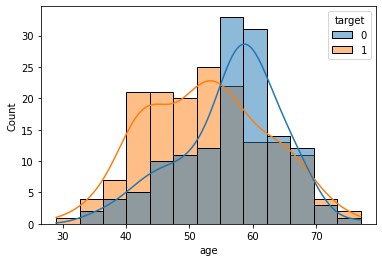

In [30]:
dist_plot(heath_df, 'age', 'target')

We can see, for lower range of age values, there are more counts heart attacks.

#### Study the composition of all patients with respect to the Sex category

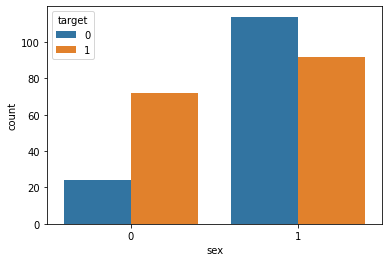

In [31]:
count_plot(heath_df, 'sex', 'target')

Male count is more than female, but proportional of heart attacks is more for females.

#### Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

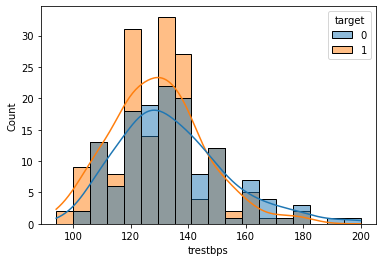

In [32]:
dist_plot(heath_df, 'trestbps', 'target')

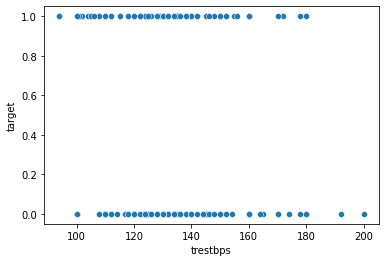

In [35]:
sns.scatterplot(data= heath_df, x='trestbps', y='target')
plt.show()

We cant see any anomoloies here in trestbps values for each target values.

#### Describe the relationship between cholesterol levels and a target variable

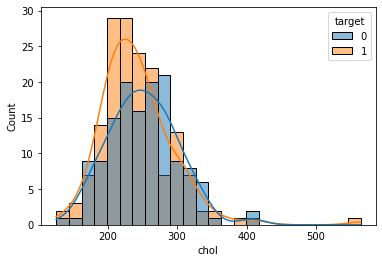

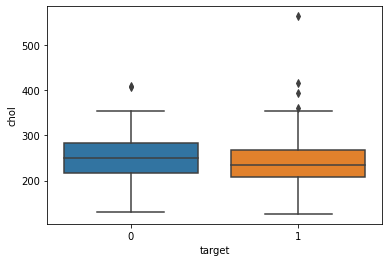

In [36]:
dist_plot(heath_df, 'chol', 'target')
box_plot(heath_df, 'chol')

We cant see much difference  between the values coresponding to each target level. But still chol values for heart attack is little hhigher.

#### State what relationship exists between peak exercising and the occurrence of a heart attack

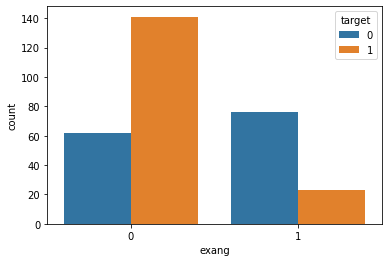

In [37]:
count_plot(heath_df, 'exang', 'target')

Exang type 0 has high chance of getting heart attack than type 1.

### Model

#### Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

From correlation, we could find below are the important features.

thalach, cp, slope, oldpeak, exang, ca, thal

We can use statusmodel to get important features based on p-values.

In [42]:
cols = ' + '.join(heath_df.columns.tolist()[:-1])
cols

'age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal'

In [43]:
model = smf.logit(formula= "target ~ " + cols, data=heath_df)

results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.348265
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                           13
Date:                Fri, 22 Jul 2022   Pseudo R-squ.:                  0.4949
Time:                        14:41:19   Log-Likelihood:                -105.18
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 7.740e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3042      2.578      1.282      0.200      -1.748       8.357
age           -0.0015      0.023     -0.063      0.950      -0.047       0.045
sex           -1.7509      0.468     -3.740      0.000      -2.669      -0.833
cp             0.8473      0.186      4.566      0.000       0.484       1.211
trestbps      -0.0202      0.010     -1.944      0.052      -0.041       0.000
chol          -0.0045      0.004     -1.179      0.238      -0.012       0.003
fbs            0.0735      0.532      0.138      0.890      -0.970       1.117
restecg        0.4506      0.349      1.293      0.196      -0.232       1.134
thalach        0.0231      0.010      2.214      0.027       0.003       0.044
exang         -0.9810      0.410     -2.394      0.017      -1.784      -0.178
oldpeak       -0.5236      0.214     -2.441      0.015      -0.944      -0.103
slope          0.5891      0.350      1.684      0.092      -0.097       1.275
ca            -0.8260      0.202     -4.091      0.000      -1.222      -0.430
thal          -0.8872      0.291     -3.052      0.002      -1.457      -0.317
==============================================================================
"""

So features like sex, cp, trestbps, thalach, exang, oldpeak, ca and thal are important for heart attack prediction. 

#### Logistic regression

In [45]:
# Get x, y

x = heath_df.drop(['target'], axis=1)
y = heath_df['target']

print(x.shape)
print(y.shape)

(302, 13)
(302,)


In [48]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(226, 13)
(226,)
(76, 13)
(76,)


In [49]:
# preprocessing

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [51]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [53]:
accuracy_lr = accuracy_score(y_test, y_pred)
fpr, tpr, th = roc_curve(y_test, y_pred)
auc_lr = auc(fpr, tpr)

In [54]:
print('Accuracy LR ' + str(accuracy_lr))
print('AUC LR' + str(auc_lr))

Accuracy LR 0.8421052631578947
AUC LR0.832276250880902


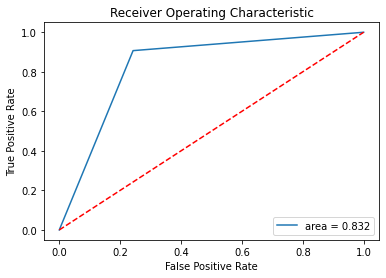

In [57]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='area = {:.3f}'.format(auc_lr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
coeffs = lr.coef_[0]
cols_indx = lr.coef_.argsort()[0][::-1]

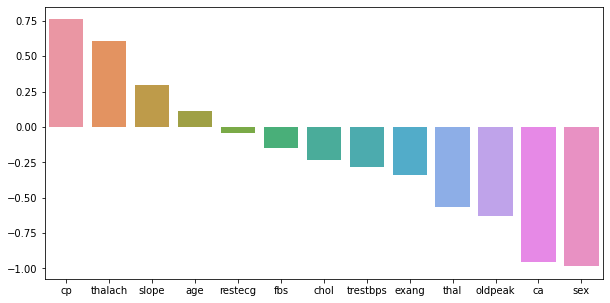

In [82]:
plt.figure(figsize=(10, 5))
sns.barplot(heath_df.columns[cols_indx], coeffs[cols_indx])
plt.show()

#### RandomForest

In [84]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [85]:
accuracy_rf = accuracy_score(y_test, y_pred)
fpr, tpr, th = roc_curve(y_test, y_pred)
auc_rf = auc(fpr, tpr)

In [86]:
print('Accuracy RF ' + str(accuracy_rf))
print('AUC RF' + str(auc_rf))

Accuracy RF 0.8421052631578947
AUC RF0.835799859055673


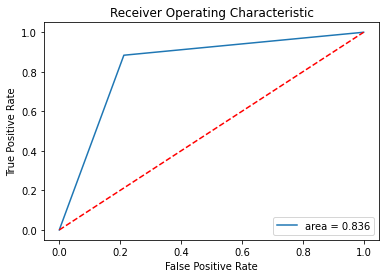

In [88]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='area = {:.3f}'.format(auc_rf))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [92]:
imp_fea_val = rf.feature_importances_
colIdx = imp_fea_val.argsort()[::-1]

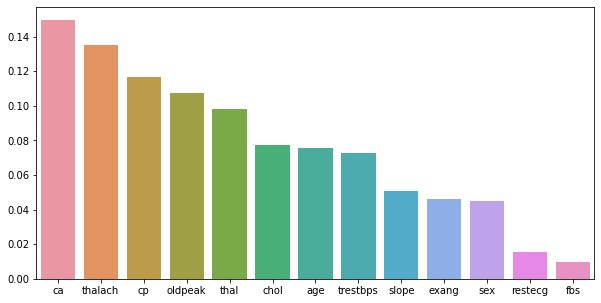

In [93]:
plt.figure(figsize=(10, 5))
sns.barplot(heath_df.columns[colIdx], imp_fea_val[colIdx])
plt.show()

As we can see, from correlation value, stats model p-value, weights from logistsic regression and feature importance from random forest, we get similar important features.